In [51]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [52]:
doc=pd.read_excel('Doc_Consultation_Fee.xlsx')
doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [53]:
df=pd.DataFrame(data=doc)
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [54]:
df.shape

(5961, 7)

In [55]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [56]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Fees'], dtype='object'),
 dtype('O'): Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
        'Miscellaneous_Info'],
       dtype='object')}

In [57]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [58]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [59]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

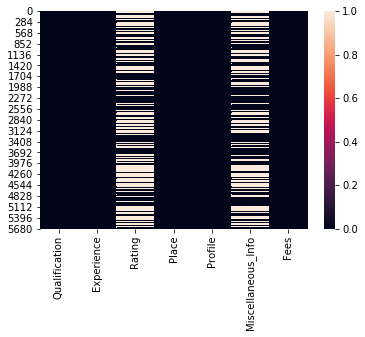

In [60]:
sns.heatmap(df.isnull())

In [61]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Fees'], dtype='object'),
 dtype('O'): Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
        'Miscellaneous_Info'],
       dtype='object')}

In [62]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [63]:
df['Exper_year']=df['Experience'].str.replace('years experience','').astype('int64')
df.drop('Experience',axis=1,inplace=True)

In [64]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [65]:
df['Rating'].fillna('0%',inplace=True)

In [66]:
def rating(text):
    text=re.sub(r'%',' ',str(text))
    return text
df['Rating']=df['Rating'].apply(rating)
df['Rating']=df['Rating'].astype('int64')

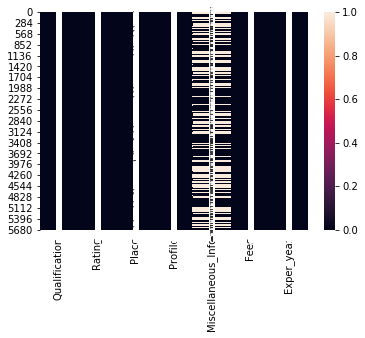

In [67]:
sns.heatmap(df.isnull(),annot=True)

In [68]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [69]:
df.dtypes

Qualification         object
Rating                 int64
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
Exper_year             int64
dtype: object

In [70]:
df['Place'].isnull().sum()

25

In [71]:
df['Place'].fillna('None',inplace=True)

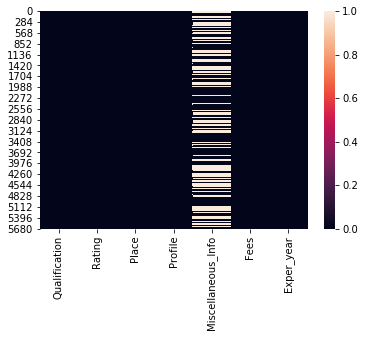

In [72]:
sns.heatmap(df.isnull())

In [73]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [74]:
def place_data(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z0-9]',' ',text)
    text=re.sub(r'\s',' ',text)
    return text
df['Place']=df['Place'].apply(place_data)

In [75]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0,mathikere bel bangalore,ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [76]:
def qualifi_data(text):
    text=re.sub(r'[^a-z]',' ',str(text).lower())
    return text
df['Qualification']=df['Qualification'].apply(qualifi_data)

In [77]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,NaN,300,9
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,bams,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [78]:
df['Miscellaneous_Info'].fillna('NO Information',inplace=True)

In [79]:
def feed(feedback):
    feedback=re.findall(r'\d+ Feedback',str(feedback))
    if feedback==[]:
        feedback='0 Feedback'
        return feedback
    else:
        return feedback[0]
    
df['Number_Of_Feedback']=df['Miscellaneous_Info'].apply(feed)
df['Number_Of_Feedback']=df['Number_Of_Feedback'].str.replace('Feedback','')
df['Number_Of_Feedback']=df['Number_Of_Feedback'].astype('int64')

In [80]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year,Number_Of_Feedback
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,16
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,76
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,NO Information,300,9,0
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,0
4,bams,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,4


In [81]:
def fee_detail(text):
    text=re.sub(r',','',text)
    text=re.findall(r'₹\d+',text)
    if text!=[]:
        return text[0]
    else:
        return 0
df['Fee_Info']=df['Miscellaneous_Info'].apply(fee_detail)
df['Fee_Info']=df['Fee_Info'].str.replace('₹','')
df['Fee_Info'].fillna(10,inplace=True)
df['Fee_Info']=df['Fee_Info'].astype('int64')

In [82]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year,Number_Of_Feedback,Fee_Info
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,16,10
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,76,10
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,NO Information,300,9,0,10
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,0,250
4,bams,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,4,10


In [83]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [84]:
df.head()

,Qualification,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback,Fee_Info
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,100,24,16,10
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,350,12,76,10
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,300,9,0,10
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,250,12,0,250
4,bams,100,keelkattalai chennai,Ayurveda,250,20,4,10


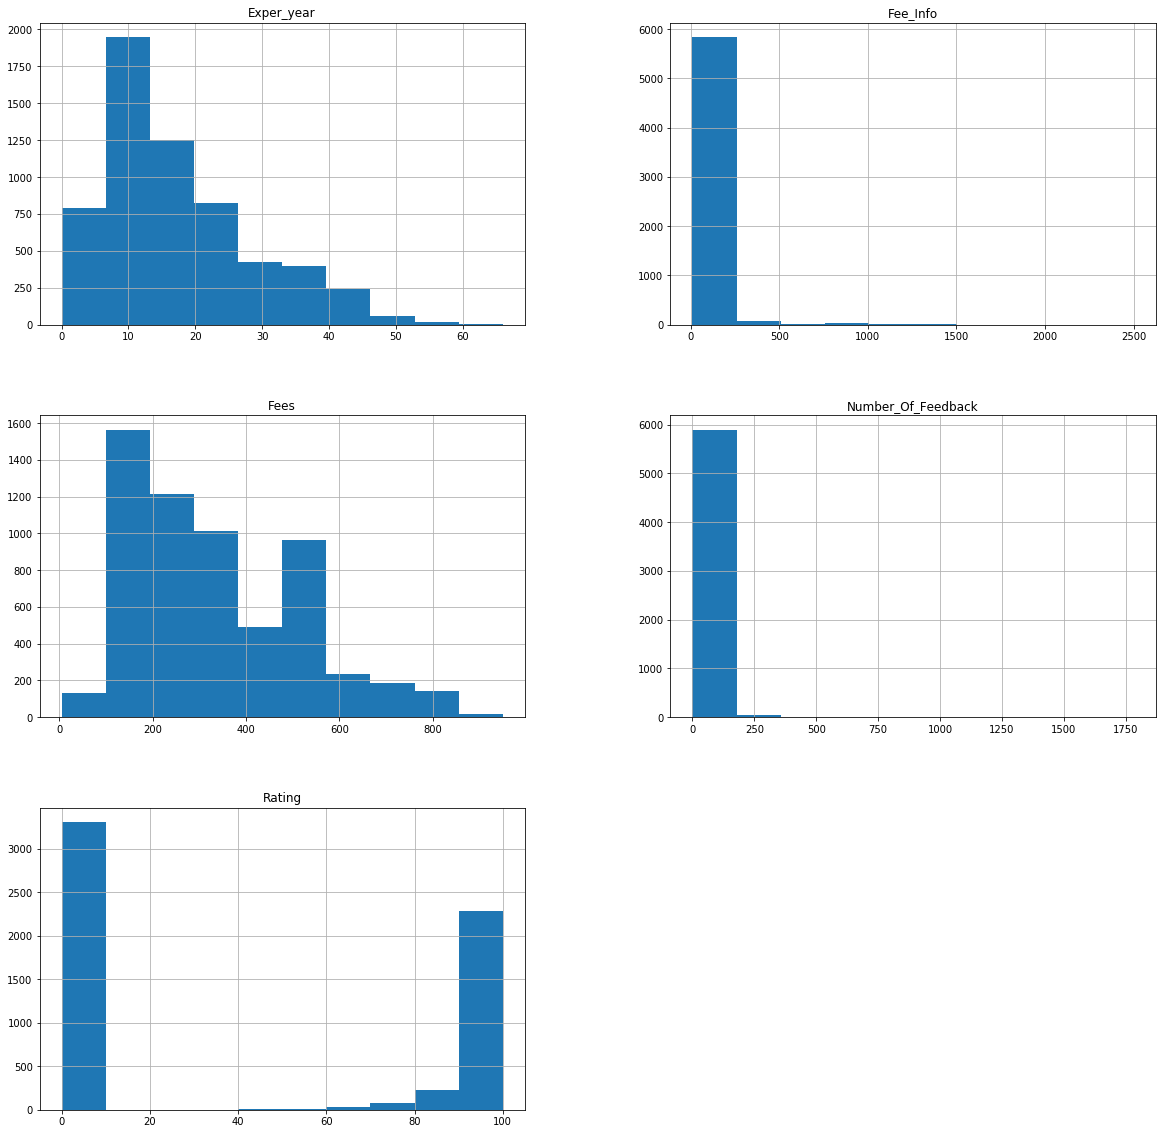

In [85]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1962e367c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1962e36cc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1962e367188>],
 'medians': [<matplotlib.lines.Line2D at 0x1962e370b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1962e370c88>],
 'means': []}

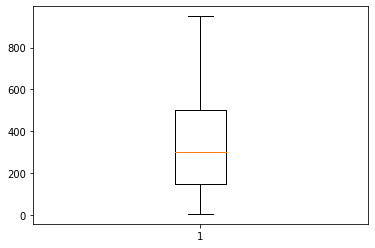

In [33]:
plt.boxplot(df['Fees'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1962e3ce6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1962e3cef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1962e3c9c08>],
 'medians': [<matplotlib.lines.Line2D at 0x1962e3d2f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1962e3d7d88>],
 'means': []}

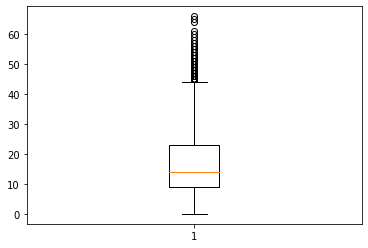

In [34]:
plt.boxplot(df['Exper_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1962e2d1a08>,
 'caps': [<matplotlib.lines.Line2D at 0x1962e2d9d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1962e2cea08>],
 'medians': [<matplotlib.lines.Line2D at 0x1962e2d67c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1962e2d6b08>],
 'means': []}

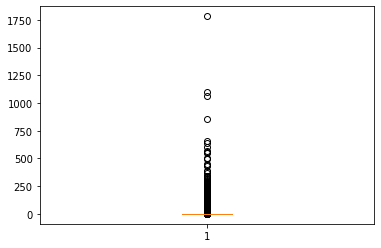

In [35]:
plt.boxplot(df['Number_Of_Feedback'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1962dd44888>,
 'caps': [<matplotlib.lines.Line2D at 0x1962dcfdf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1962e338d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1962e2dd948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1962e327608>],
 'means': []}

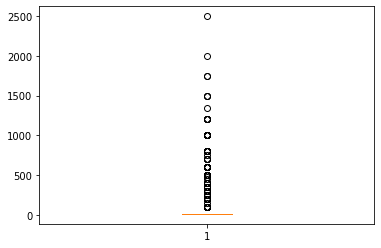

In [36]:
plt.boxplot(df['Fee_Info'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1962dd32b88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1962dd0fec8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1962dd26748>,
 'cbars': <matplotlib.collections.LineCollection at 0x1962e3c95c8>}

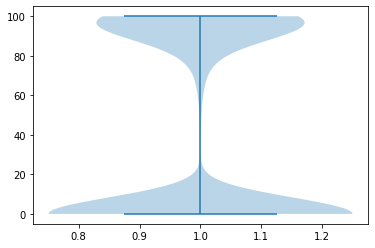

In [37]:
plt.violinplot(df['Rating'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1962daa4a08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1962da521c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1962da9e648>,
 'cbars': <matplotlib.collections.LineCollection at 0x1962da9ed48>}

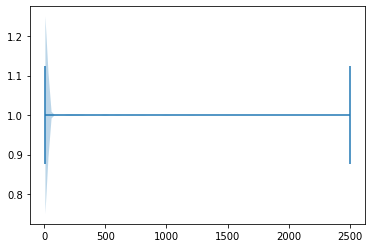

In [38]:
plt.violinplot(df['Fee_Info'],vert=False)

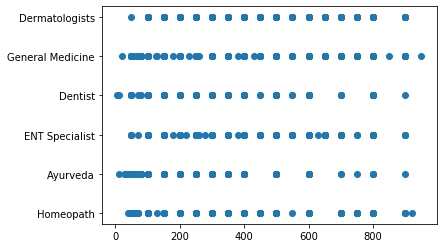

In [39]:
plt.scatter('Fees','Profile',data=df)

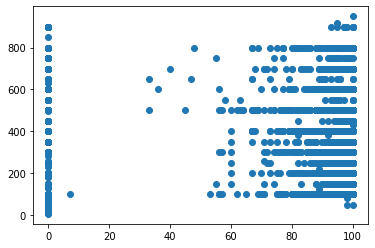

In [40]:
plt.scatter('Rating','Fees',data=df)

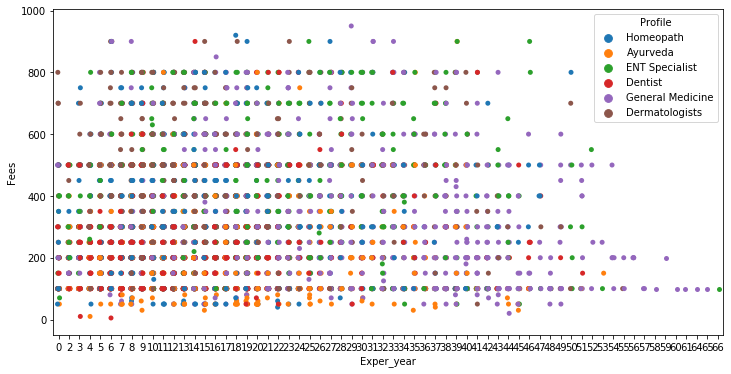

In [51]:
plt.figure(figsize=(12,6))
sns.stripplot('Exper_year','Fees',hue='Profile',data=df)

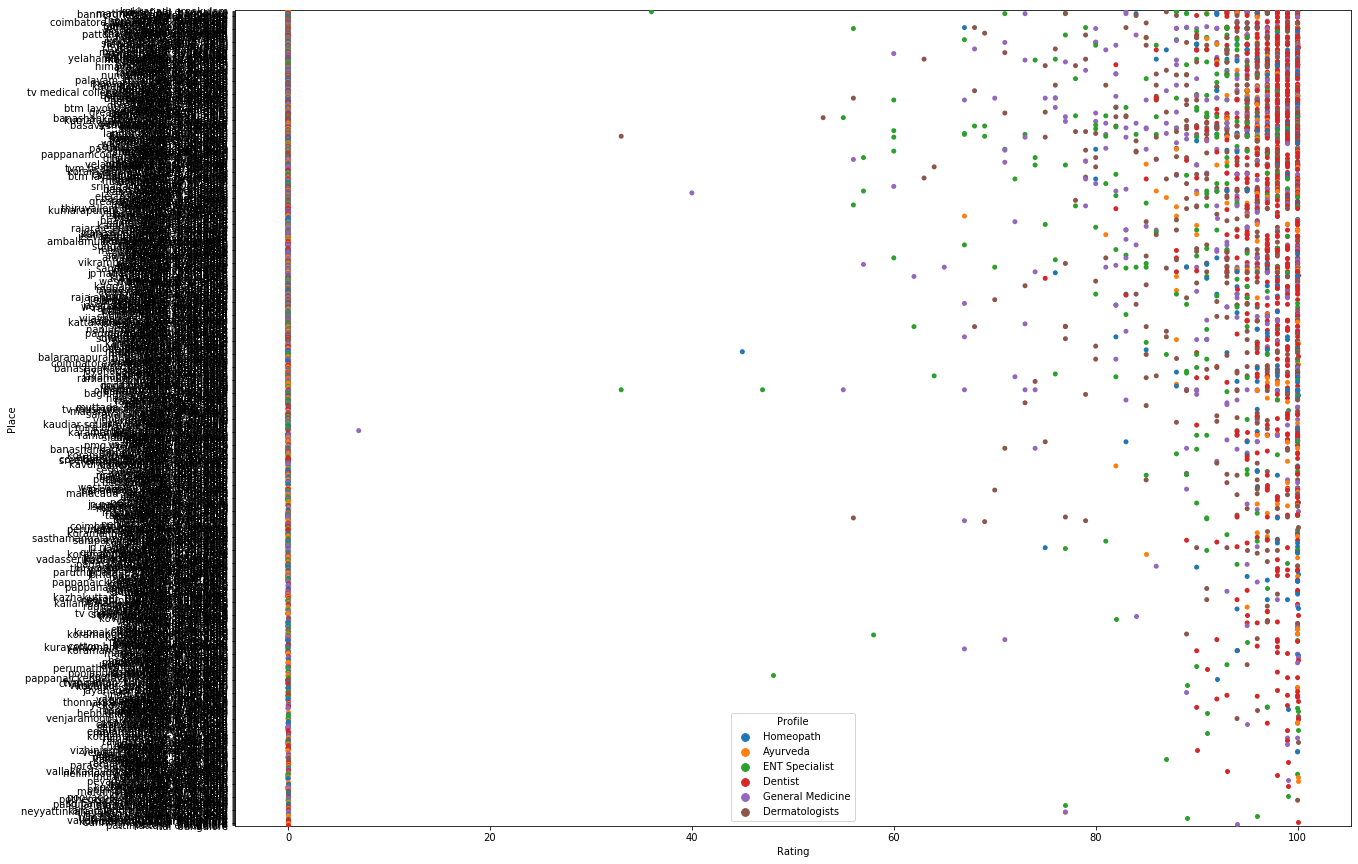

In [42]:
plt.figure(figsize=(20,15))
sns.swarmplot('Rating','Place',hue='Profile',data=df)

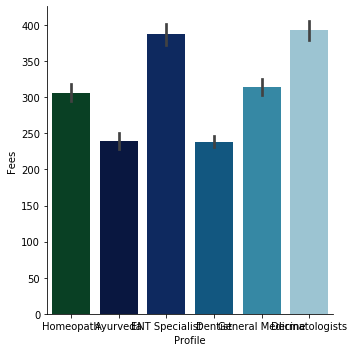

In [45]:
sns.catplot('Profile','Fees',data=df,palette='ocean',kind='bar')

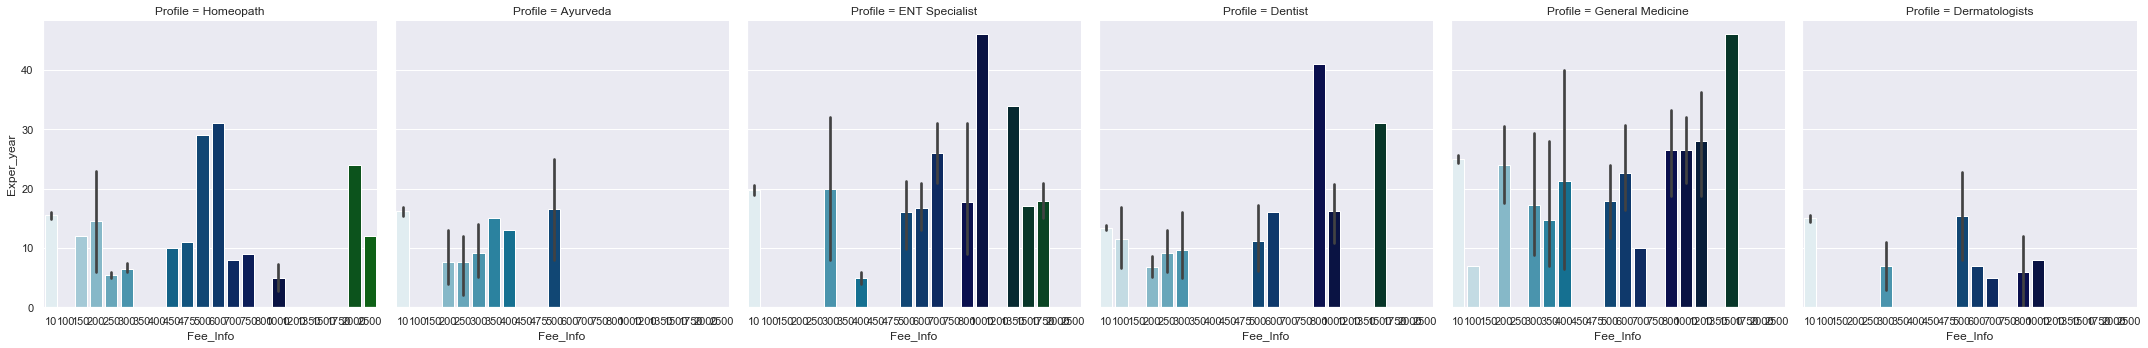

In [51]:
sns.set(style='darkgrid')
sns.catplot('Fee_Info','Exper_year',col='Profile',data=df,palette='ocean_r',kind='bar')

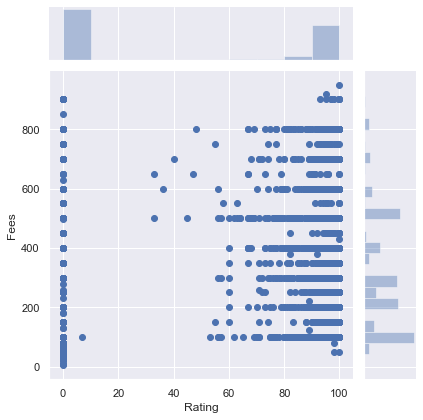

In [53]:
sns.jointplot('Rating','Fees',data=df,height=6,ratio=5,kind='scatter')

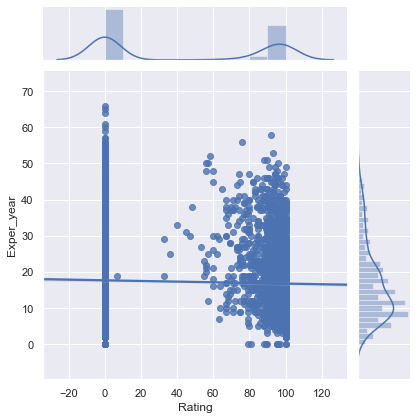

In [55]:
sns.jointplot('Rating','Exper_year',data=df,height=6,ratio=5,kind='reg')

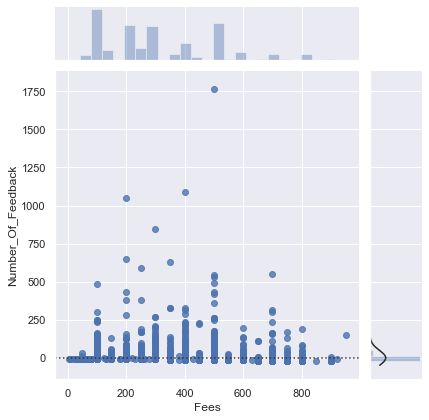

In [56]:
sns.jointplot('Fees','Number_Of_Feedback',space=.2,data=df,kind='resid')

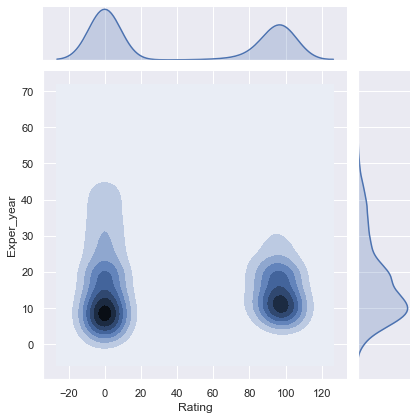

In [57]:
sns.jointplot('Rating','Exper_year',data=df,height=6,ratio=5,kind='kde')

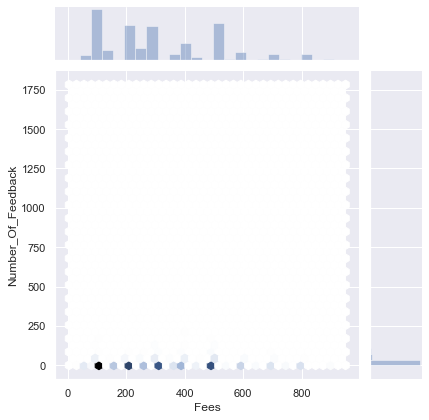

In [58]:
sns.jointplot('Fees','Number_Of_Feedback',space=.2,data=df,kind='hex')

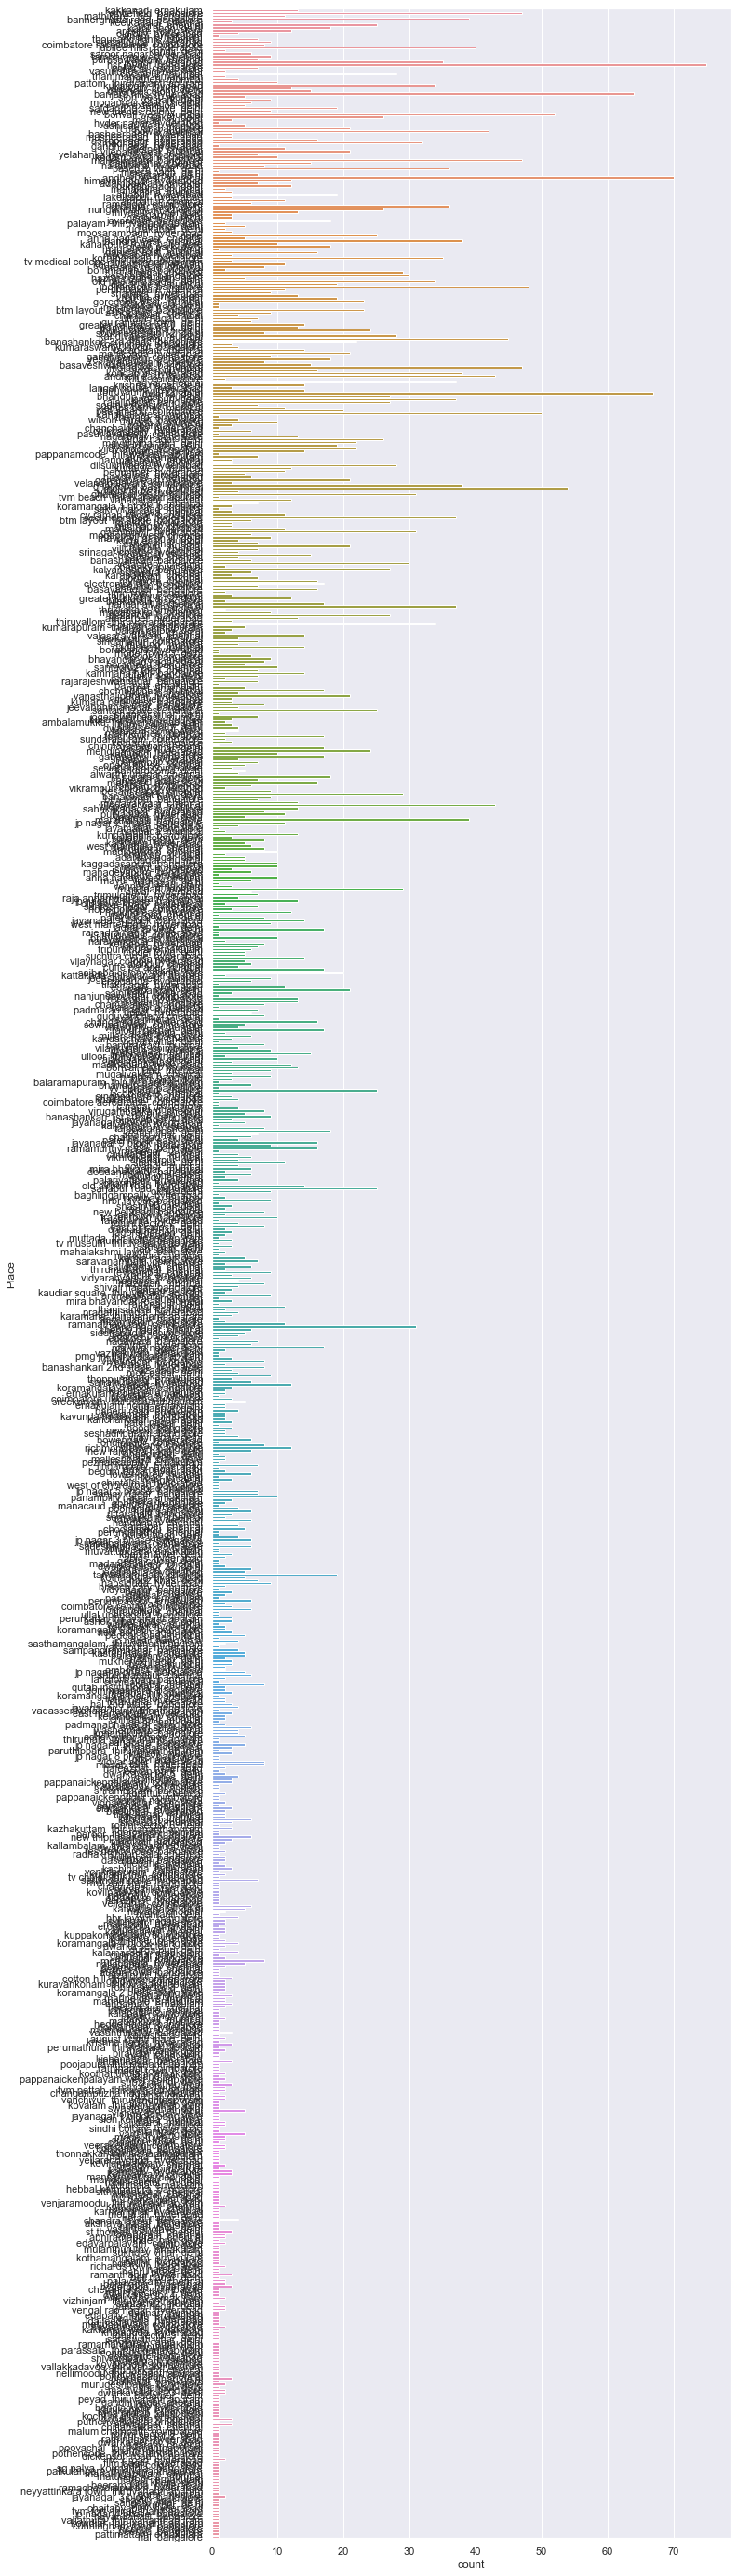

In [63]:
plt.figure(figsize=(10,50))
sns.countplot(y='Place',data=df)

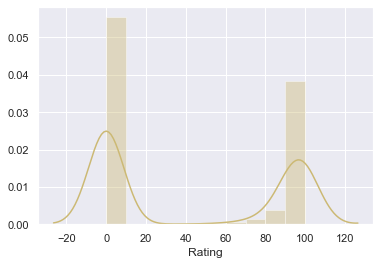

In [65]:
sns.distplot(df['Rating'],color='y')

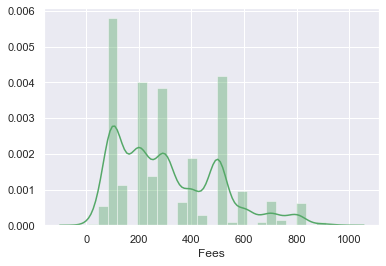

In [68]:
sns.distplot(df['Fees'],color='g',vertical=False)

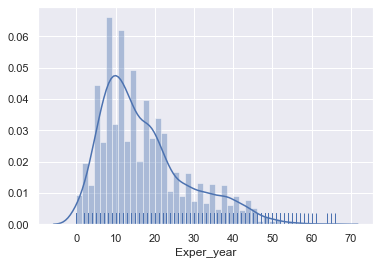

In [69]:
sns.distplot(df['Exper_year'],rug=True)

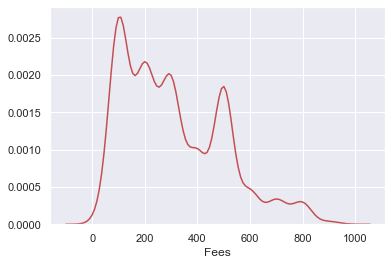

In [70]:
sns.distplot(df['Fees'],color='r',hist=False)

In [86]:
df.describe()

,Rating,Fees,Exper_year,Number_Of_Feedback,Fee_Info
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,42.217245,307.944640,17.303976,10.373427,25.608958
std,47.340934,190.920373,11.142798,49.603087,109.841320
min,0.000000,5.000000,0.000000,0.000000,10.000000
25%,0.000000,150.000000,9.000000,0.000000,10.000000
50%,0.000000,300.000000,14.000000,0.000000,10.000000
75%,96.000000,500.000000,23.000000,1.000000,10.000000
max,100.000000,950.000000,66.000000,1782.000000,2500.000000


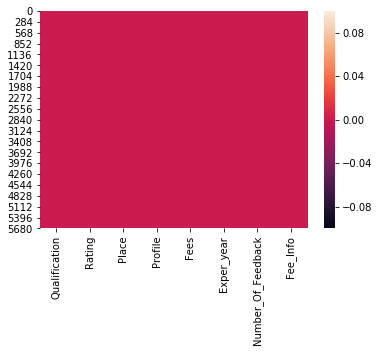

In [87]:
sns.heatmap(df.isnull())

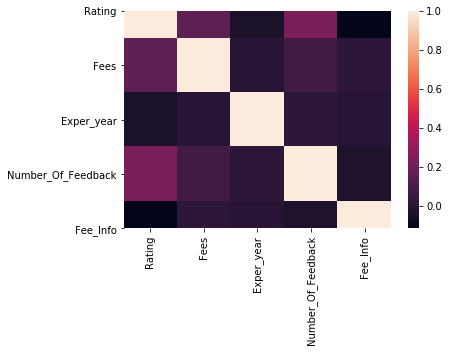

In [88]:
sns.heatmap(df.corr())

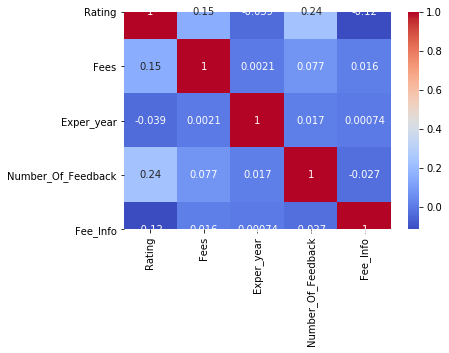

In [89]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [90]:
len(df['Qualification'].unique())

1420

In [91]:
len(df['Place'].unique())

878

In [92]:
len(df['Profile'].unique())

6

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le=LabelEncoder()

In [95]:
df['Qualification']=le.fit_transform(df['Qualification'])
df['Place']=le.fit_transform(df['Place'])
df['Profile']=le.fit_transform(df['Profile'])

In [96]:
df.head()

,Qualification,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback,Fee_Info
0,404,100,296,5,100,24,16,10
1,74,98,868,0,350,12,76,10
2,1143,0,454,3,300,9,0,10
3,464,0,65,0,250,12,0,250
4,10,100,335,0,250,20,4,10


In [97]:
x=df.drop('Fees',axis=1)
x.tail()

,Qualification,Rating,Place,Profile,Exper_year,Number_Of_Feedback,Fee_Info
5956,1084,98,67,3,19,45,10
5957,597,0,543,4,33,0,10
5958,597,97,217,4,41,11,10
5959,949,90,852,4,15,0,10
5960,244,100,604,1,17,0,10


In [98]:
y=df['Fees']
y.tail()

5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, dtype: int64

In [99]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier(),MultinomialNB()]

In [100]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for c in models:
        c.fit(x_train,y_train)
        c.score(x_train,y_train)
        predc=c.predict(x_test)
        accu_value=accuracy_score(y_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model_reg is',final_model)

Accuracy score correspond to random state 40 is 0.23704268292682926
Accuracy score correspond to random state 40 is 0.21798780487804878
Accuracy score correspond to random state 40 is 0.23780487804878048
Accuracy score correspond to random state 40 is 0.23932926829268292
Accuracy score correspond to random state 40 is 0.04954268292682927
Accuracy score correspond to random state 41 is 0.23170731707317074
Accuracy score correspond to random state 41 is 0.23780487804878048
Accuracy score correspond to random state 41 is 0.2301829268292683
Accuracy score correspond to random state 41 is 0.24847560975609756
Accuracy score correspond to random state 41 is 0.041920731707317076
Accuracy score correspond to random state 42 is 0.22865853658536586
Accuracy score correspond to random state 42 is 0.2301829268292683
Accuracy score correspond to random state 42 is 0.2423780487804878
Accuracy score correspond to random state 42 is 0.25
Accuracy score correspond to random state 42 is 0.024390243902439

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=48)

In [102]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.246680642907058
[[  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   7   0   0   0   2   0   3   0   0   0   4   0
    0   0   0   0   0   0   0]
 [  0   0   2   0   1   0   0   0   1   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   3   0   1   0   1   0   0   0   1   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   6   0   3   0 139   0   3   1  51   6  40   5   7   1  42   0
    4   0   0   2   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0   0   0   0   0  15   0   2   0  14   4  12   2   3   0   7   0
    1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0

In [103]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [104]:
parameter={'criterion':('gini','entropy'),'n_estimators':range(10,30)}
grid=GridSearchCV(rfc,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [105]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=20)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.24947589098532494
[[  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   3   0   1   0   9   0   0   0   0   0   3   0   0   0   2   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   1   0   1   1   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   3   0   0   0   0   1   0   1   0
    0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   9   0   2   0 148   0   3  45   1   5  42   3   8   0  39   0
    3   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0   0   0   0   0  17   0   3  13   0   5  11   1   1   0   7   0
    1   0   0   1   0   0   0]
 [  0   0   4   0   0   0  69   0  

In [106]:
rnd=RandomizedSearchCV(rfc,param_distributions=parameter)
rnd.fit(x_train,y_train)
print(rnd)
print(rnd.best_params_)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=Non

In [107]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=25)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.2543675751222921
[[  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   8   0   0   0   0   4   0   0   0   0   3   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   1   0   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2   0   1   3   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0
    1   0   0   0   0   0   0]
 [  0   0   5   0   2   1 150   0   5  49   5  41   4   1   4   0  37   0
    2   0   0   2   0   4   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14   0   2  15   5   9   1   0   5   0   7   0
    1   0   0   1   0   0   0]
 [  0   0   4   0   0   0  70   0   

In [108]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.2526749  0.24540902 0.254836   0.23604061 0.2548853 ]
0.24876916390630824
0.007249483550988982


In [ ]:
from sklearn.externals import joblib

In [99]:
joblib.dump(rfc,'DoctorFeesFile.obj')

['DoctorFeesFile.obj']